# Project: Investigate a TMDB Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">Question 1: Which genres are more popular and profitable </a></li>
        <li><a href="#q2">Question 2: Which company makes the most profit </a></li>
        <li><a href="#q3">Question 3: What keywords are the most popular </a></li>
        <li><a href="#q4">Question 4: Which gerens have high budget </a></li>
        <li><a href="#q5">Question 5: The correlation between features </a></li>
        <li><a href="#q6">Question 6: Which year had a lot of moives </a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10000 movies collected from The Movie Database (TMDb), including user ratings and revenue. also, there are 21 columns. I will investigate and going to extract useful information after cleaning the missing values and handling duplicates values 

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

#Imports
import numpy as np
import pandas as pd
import csv

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure charts appear in the notebook:
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties
#### In this section I will load the data, check about the descriptive statistics, see how many rows and columns does the data has, investigate the data types, and then check how many missing values and duplicates does it have.   



In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# to see useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# to know how mnay rows and columns do we have 
# investigating the data types and missing values 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### now we know that we have 10866 rows( entries ) and 21 columns 
### also we have missing values as it shows in the some columns such as "tagline  , keywords, and etc..) next step will show more details

In [9]:
# to figure out in which columns we have missing values  
print(df.isnull().sum())
# and to know the total missing values 
print(df.isnull().any(axis=1).sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
8874


### we have too many missing values 8874 

In [10]:
# check the duplicated values 
sum(df.duplicated())

1

### it has only 1 duplicated data 

### Data Cleaning 

In [11]:
# deleting the columns

df_droped_columns = df.drop(['homepage', 'tagline', 'homepage', 'overview', 'release_date', 'budget','revenue', 'imdb_id'], axis=1)
df_droped_columns.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# Removing all rows with missing data 
df_droped_columns.dropna(inplace = True)

# Removing all duplicated rows
df_droped_columns.drop_duplicates(inplace = True)

In [13]:
# making sure now the data doesn't have any missing values or duplicated 
print(df_droped_columns.isnull().any(axis=1).sum())

print(sum(df_droped_columns.duplicated()))

0
0


### as it showed there are no missing values or duplicated

In [14]:
# saving it to new variabel
df_cleaned = df_droped_columns

In [15]:
# check dimensions
df_cleaned.shape

(8666, 14)

In [16]:
df_cleaned.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


<a id='q1'></a>
### Research Question 1 (Which genres are more popular and profitable)

In [83]:
# split the genres which a movie belong to from combined value into single genre value 
genres_per_id = df_cleaned.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

genres_per_id.head()


,Adventure,Action,Thriller,Science Fiction,Fantasy,Crime,Western,Drama,Family,Comedy,Animation,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Count the number of each genre
genre_count = genres_per_id.sum(axis = 0)
# Transform data into data frame
genre_count_df = pd.DataFrame(genre_count, columns=[ 'count'])
genre_count_df['genre'] = genre_count_df.index # Make new column with genre data
genre_count_df

,count,genre
Adventure,1271.0,Adventure
Action,2022.0,Action
Thriller,2462.0,Thriller
Science Fiction,1028.0,Science Fiction
Fantasy,763.0,Fantasy
Crime,1200.0,Crime
Western,154.0,Western
Drama,3934.0,Drama
Family,946.0,Family
Comedy,3050.0,Comedy


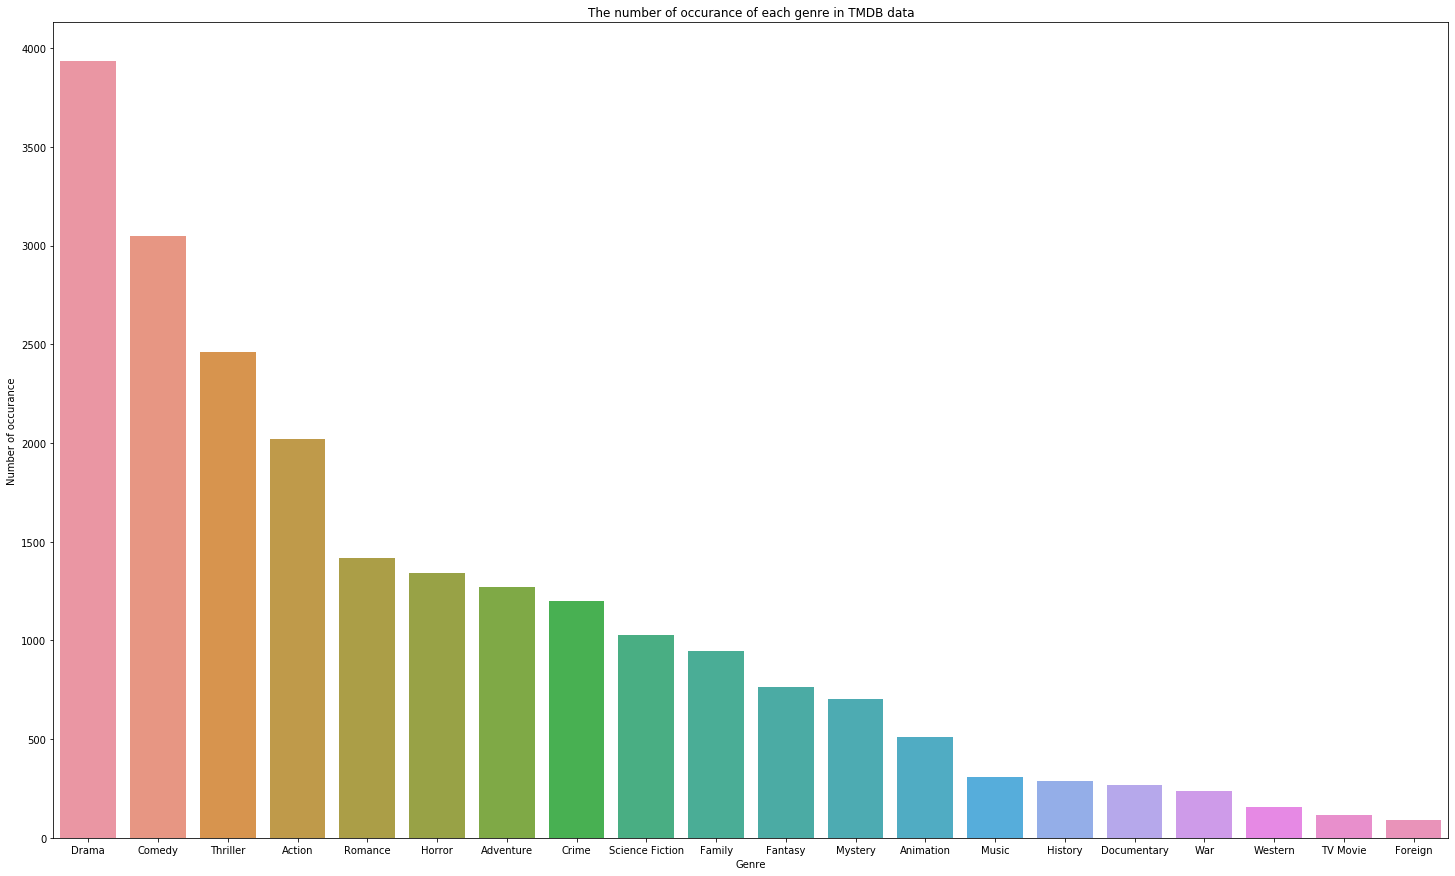

In [19]:
# plot the number of occurance of each genre in TMDB data to see which genres have highest number

# figure size of plot
plt.figure(figsize=[25,15])

# bar plot
sns.barplot(data=genre_count_df.sort_values(by='count', ascending=False), x='genre', y='count')

# x-axis label name
plt.xlabel('Genre')

# y-axis label name
plt.ylabel('Number of occurance')

# title of the graph
plt.title('The number of occurance of each genre in TMDB data')
plt.show()

### as it showed the top 4 genres are Drame, Comedy, Thriller and Action 

In [20]:
# calculate popularity of each genre

# Get the list of genres
genres = list(genre_count_df.genre)

In [21]:
# Calculating the total popularity for each genre
genre_pop = np.matrix(df_cleaned.popularity) * np.matrix(genres_per_id)

# Get the popularity as a list
genre_pop_list = genre_pop.tolist()[0]

In [22]:
# Create a data frame with genre and corresponding popularity
genre_popular = pd.DataFrame(
    {'genre': genres,
        'popularity': genre_pop_list})

genre_popular

,genre,popularity
0,Adventure,1628.002247
1,Action,2085.537613
2,Thriller,2012.124108
3,Science Fiction,1175.965011
4,Fantasy,856.232009
5,Crime,951.780753
6,Western,93.971318
7,Drama,2588.158582
8,Family,870.439302
9,Comedy,2053.015220


### now we can create the plot to prove which grens are the most popular



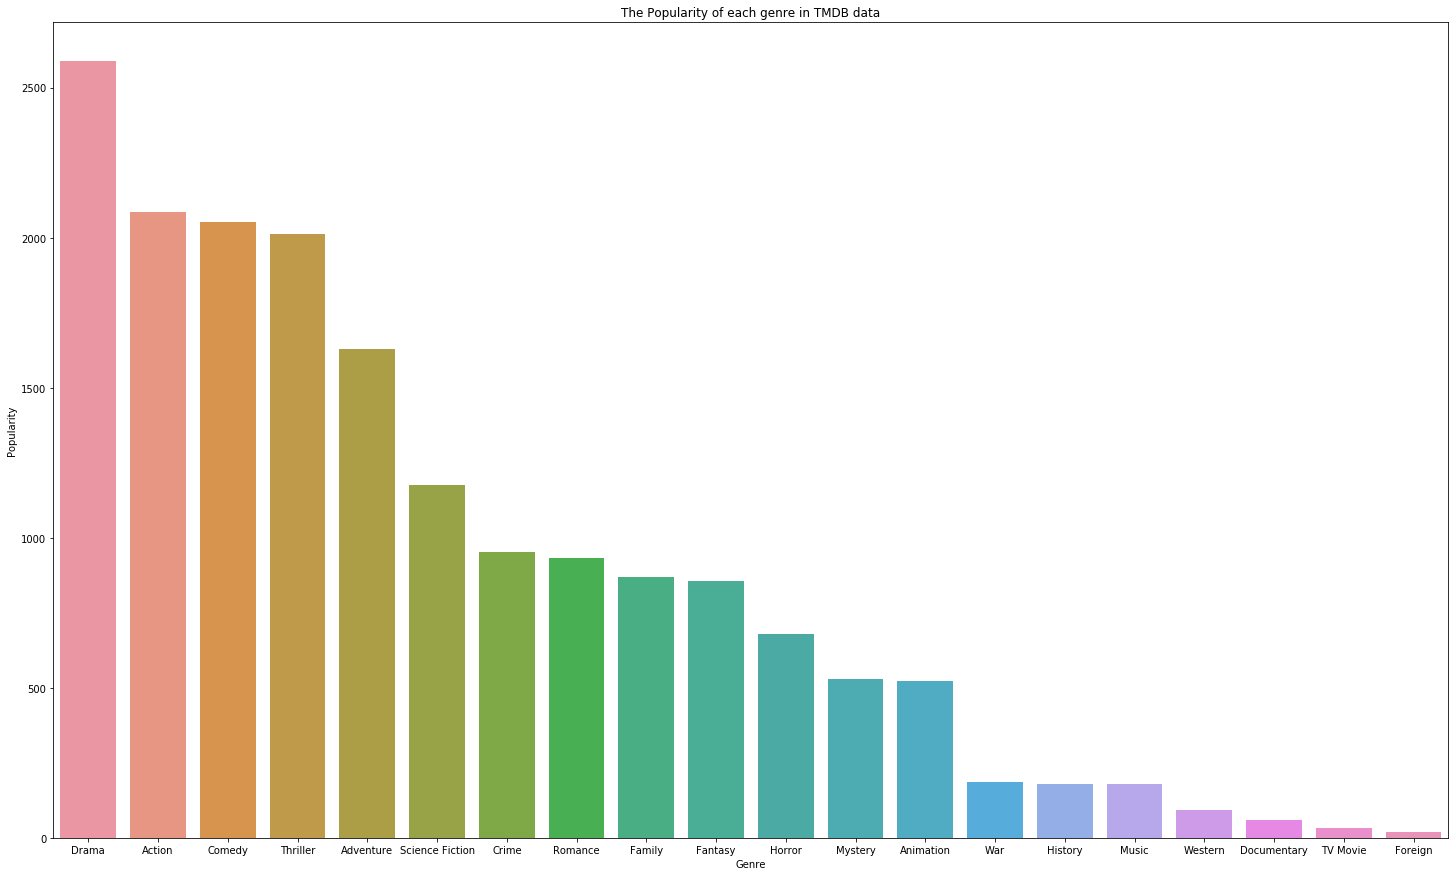

In [23]:
# Plot the The Popularity of each genre in TMDB data

# figure size of plot
plt.figure(figsize=[25,15])

# bar plot
sns.barplot(data=genre_popular.sort_values(by='popularity', ascending=False), x='genre', y='popularity')

# x-axis label name
plt.xlabel('Genre')

# y-axis label name
plt.ylabel('Popularity')

# title of the graph
plt.title('The Popularity of each genre in TMDB data')
plt.show()

### Drama is the most popular genre, following by action, comedy and thriller and they are close to each other.

### Calculate revenue for each genre to figure out which genre is more profitable

In [24]:
# Calculate the revenue for each genre
genre_rev = np.matrix(df_cleaned.revenue_adj) * np.matrix(genres_per_id)

# Get revenue data
genre_rev_list = genre_rev.tolist()[0]

In [25]:
# Create a data frame with genres and revenues
genre_revenue = pd.DataFrame(
    {'genre': genres,
        'revenue': genre_rev_list})

### let's create the plot to prove which gerens are the most profitable

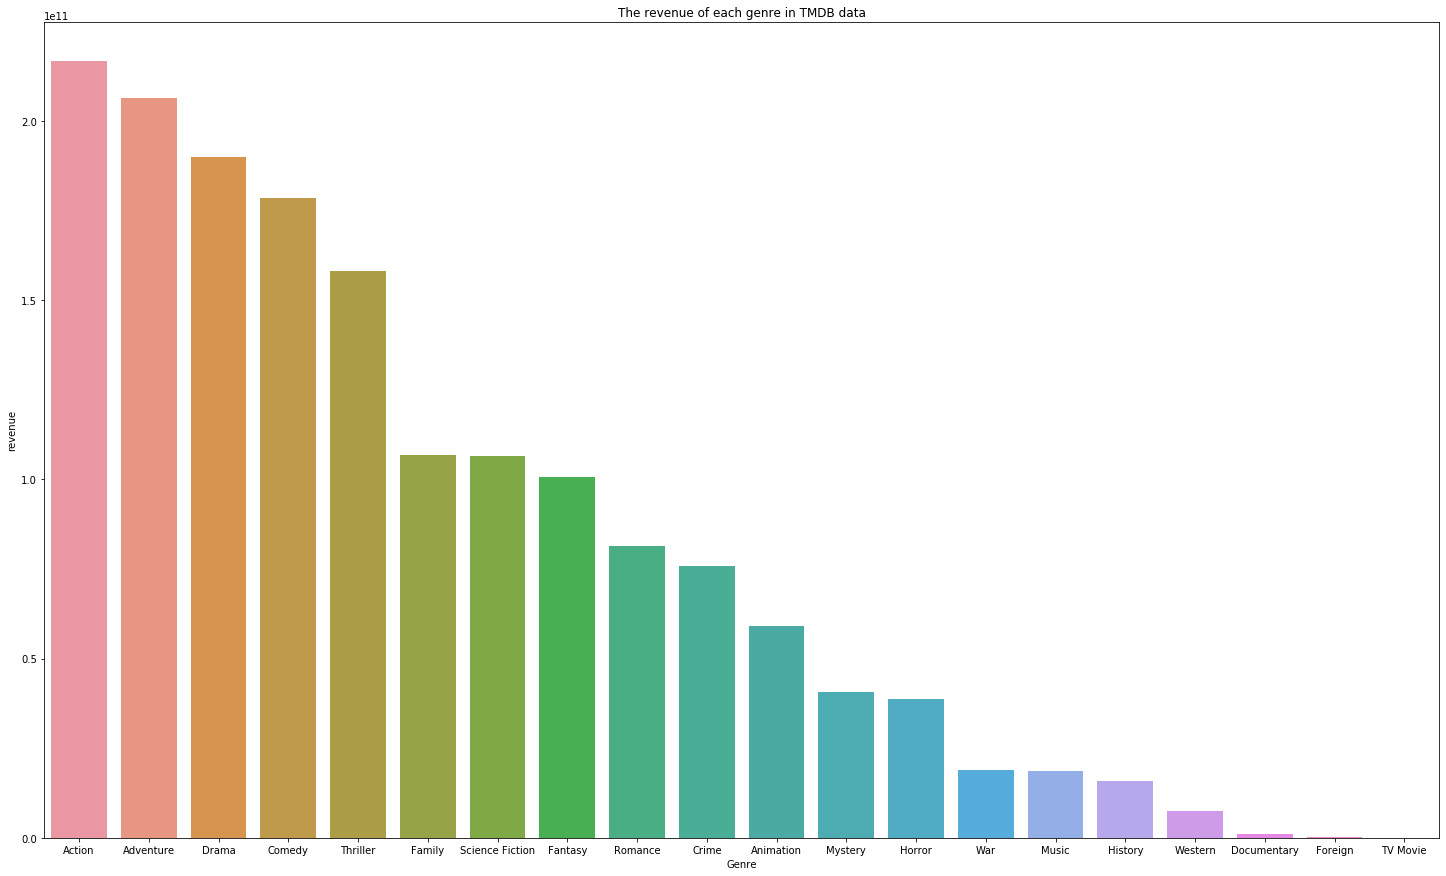

In [26]:
# plot the Revenue of each genre in TMDB data

# figure size of plot
plt.figure(figsize=[25,15])

# bar plot
sns.barplot(data=genre_revenue.sort_values(by='revenue', ascending=False), x='genre', y='revenue')

# x-axis label name
plt.xlabel('Genre')

# y-axis label name
plt.ylabel('revenue')

# title of the graph
plt.title('The revenue of each genre in TMDB data')
plt.show()

### it shows that the Action is the most profitable following then by Adventure, Drama , Comedy and Thriller. the most worst is TV Movie  
 

<a id='q2'></a>
### Research Question 2  (Which company makes the most profit)

In [27]:
# Split the company from a combined value to single value
comp_per_id = df_cleaned.production_companies.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [28]:
# Extract the companies which have over 50 movies
comp_over50 = comp_per_id.sum()[comp_per_id.sum()>50].index.tolist()

In [29]:
# Get the company data with those which have over 50 movies
comp_per_id_over50 = comp_per_id[comp_over50]

### let's calculate the revenue for each company

In [30]:
# Calculate the revenue for each company
comp_revenue_ma = np.matrix(df_cleaned.revenue_adj) * np.matrix(comp_per_id_over50)

# Get revenue data
comp_rev_list = comp_revenue_ma.tolist()[0]

In [31]:
# Create a data frame with companies and revenue
comp_revenue = pd.DataFrame(
    {'companies': comp_over50,
        'revenue': comp_rev_list})

### Let's create the plot to see overall revenue of each company 

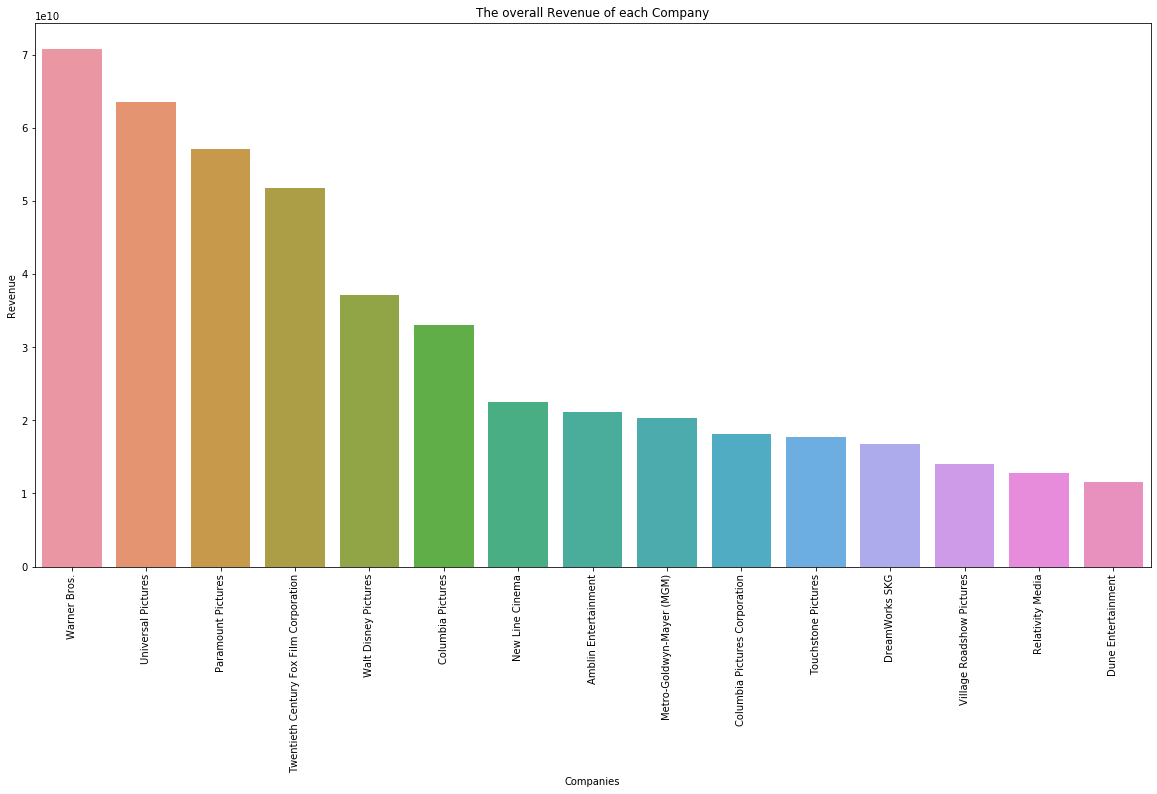

In [32]:
# plot the Revenue of each company in TMDB data

# figure size of plot
plt.figure(figsize=[20,10])

# bar plot
sns.barplot(data=comp_revenue.sort_values(by='revenue', ascending=False)[0:15], x='companies', y='revenue')

# x-axis label name
plt.xlabel('Companies')
# to rotat the x label
plt.xticks(rotation=90)

# y-axis label name
plt.ylabel('Revenue')

# title of the graph
plt.title('The overall Revenue of each Company')
plt.show()

### the top 3 companies are Warner Bros, Universal Pictures, and Paramount Pictures those have the highest revenue

<a id='q3'></a>
### Research Question 3 (What keywords are the most popular)


In [35]:
# split the keywords from a combined value to single keyword value
keyword_per_id = df_cleaned.keywords.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [36]:
# Extract keywords data which have over 100 frequency
keyword100_count = pd.DataFrame(keyword_per_id.sum()[keyword_per_id.sum()>100], columns=[ 'count'])

# Get top 100 frequent keywords
keyword100_count['keyword'] = keyword100_count.index

In [37]:
# Get a list of keywords which have over 100 frequency
keyword100 = keyword_per_id.sum()[keyword_per_id.sum()>100].index.tolist()
keyword_per_id_over100 = keyword_per_id[keyword100]

### Let's create the plot to see the more frequent keywords 

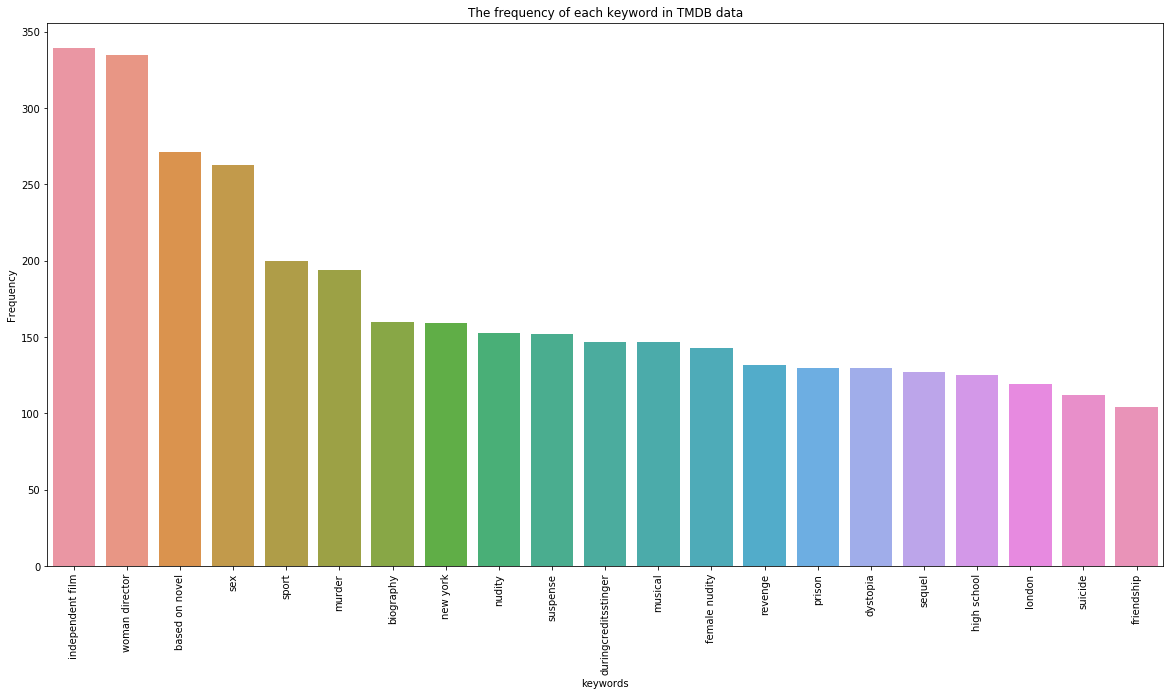

In [38]:
# plot the Revenue of each company in TMDB data

# figure size of plot
plt.figure(figsize=[20,10])

# bar plot
sns.barplot(data=keyword100_count.sort_values(by='count', ascending=False), x='keyword', y='count')

# x-axis label name
plt.xlabel('keywords')
# to rotat the x label
plt.xticks(rotation=90)

# y-axis label name
plt.ylabel('Frequency')

# title of the graph
plt.title('The frequency of each keyword in TMDB data')
plt.show()

### The Independent Film and Woman Director are closer to each other but "Independent Film" is higher.


<a id='q4'></a>
### Research Question 4 ( Which gerens have high budget )

In [39]:
# Calculate the budget for each genre
genre_budget = np.matrix(df_cleaned.budget_adj) * np.matrix(genres_per_id)

# Get budget data
genre_budget_list = genre_budget.tolist()[0]

In [40]:
# Create a data frame with genres and budget
genre_bud = pd.DataFrame(
    {'genre': genres,
        'budget': genre_budget_list})

### Let's create plot to see which gerens have high budget

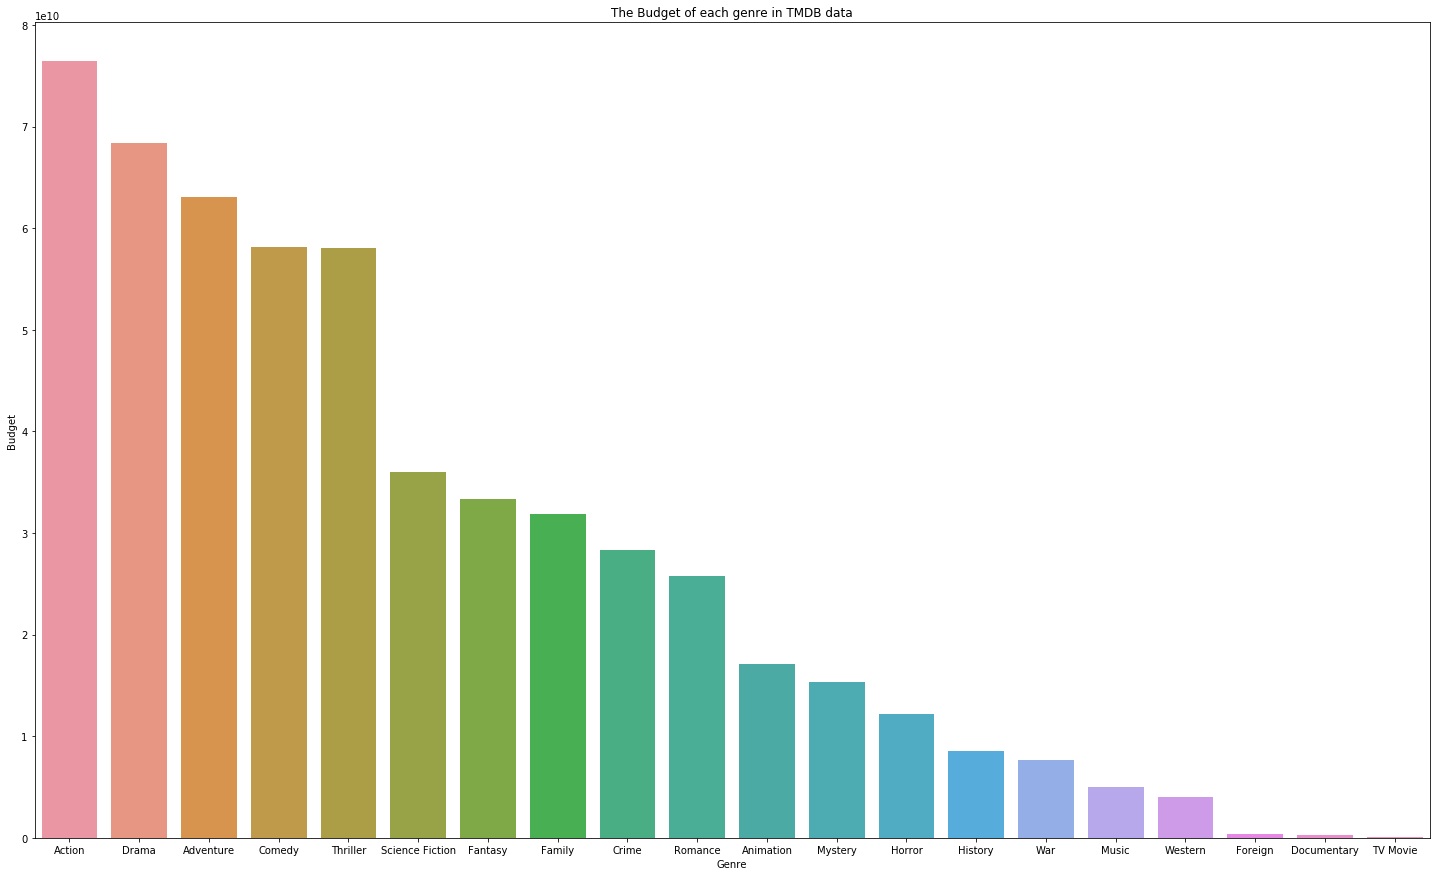

In [42]:
# plot the budget of each genre in TMDB data

# figure size of plot
plt.figure(figsize=[25,15])

# bar plot
sns.barplot(data=genre_bud.sort_values(by='budget', ascending=False), x='genre', y='budget')

# x-axis label name
plt.xlabel('Genre')

# y-axis label name
plt.ylabel('Budget')

# title of the graph
plt.title('The Budget of each genre in TMDB data')
plt.show()

### So as it shows the Action movies need high budget then others, but Comedy and Thriller both have same budget 

<a id='q5'></a>
### Research Question 5 (The correlation between features)

In [43]:
# Drop original columns 
data_dropped = df_cleaned.drop(['keywords', 'genres', 'production_companies', 'cast', 'id'], axis=1)

# Combine single genre, single company with over 50 frequency and single keyword with over 100 frequency data frames into original data
data_trans = pd.concat([data_dropped, genres_per_id, comp_per_id_over50, keyword_per_id_over100], axis=1)

In [44]:
# Calculate correlation
data_corr = data_trans.corr()

# Show the top 5 of correlation matrix
data_corr.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Adventure,Action,Thriller,...,new york,nudity,female nudity,friendship,high school,sex,suicide,prison,musical,independent film
popularity,1.000000,0.164396,0.801427,0.244908,0.137028,0.497885,0.601623,0.205439,0.146837,0.043636,...,0.005803,-0.029749,-0.020881,0.013756,-0.006131,-0.022908,-0.011002,0.006988,0.000829,-0.077353
runtime,0.164396,1.000000,0.197061,0.203444,-0.128077,0.267023,0.211785,0.052438,0.057280,0.016082,...,0.031511,-0.019083,-0.019342,-0.018391,-0.038811,-0.014795,0.022055,0.030068,0.021148,-0.037278
vote_count,0.801427,0.197061,1.000000,0.288350,0.149792,0.576545,0.700349,0.210294,0.167138,0.029605,...,-0.004015,-0.035443,-0.026071,0.023485,-0.003568,-0.037398,-0.011530,0.003085,-0.011125,-0.071576
vote_average,0.244908,0.203444,0.288350,1.000000,-0.124069,0.102849,0.218216,-0.008065,-0.095028,-0.132531,...,0.001180,-0.048105,-0.055674,0.028257,-0.006122,-0.046263,0.009257,0.042531,0.025673,-0.012340
release_year,0.137028,-0.128077,0.149792,-0.124069,1.000000,0.065538,-0.037964,-0.048037,-0.038271,0.024839,...,-0.017862,-0.035648,-0.032857,0.022164,0.040246,-0.004536,0.003049,-0.045803,-0.035424,0.028317


<a id='q6'></a>
### Research Question 5 (Which year had a lot of moives)

In [67]:
# group by realse year with original titile because each titile is persent it as a movie
movies = df_cleaned.groupby('release_year')['original_title'].count()

movies

release_year
1960     30
1961     28
1962     30
1963     33
1964     41
1965     33
1966     44
1967     34
1968     36
1969     25
1970     38
1971     54
1972     36
1973     55
1974     43
1975     40
1976     44
1977     54
1978     59
1979     54
1980     72
1981     74
1982     78
1983     74
1984     96
1985     96
1986    103
1987    104
1988    120
1989    118
1990    123
1991    111
1992    120
1993    165
1994    164
1995    159
1996    182
1997    174
1998    181
1999    198
2000    184
2001    196
2002    219
2003    214
2004    237
2005    299
2006    325
2007    347
2008    380
2009    413
2010    343
2011    383
2012    387
2013    456
2014    520
2015    440
Name: original_title, dtype: int64

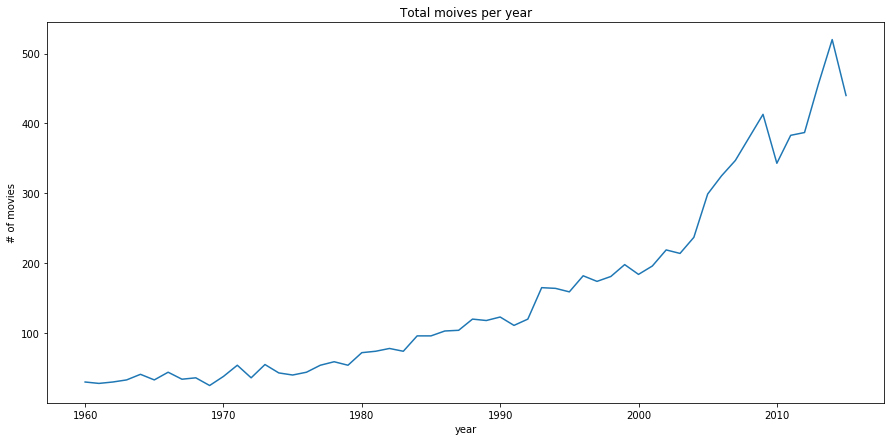

In [82]:
# plot the movies each year

# figure size of plot
plt.figure(figsize=(15, 7), linewidth=2.5)

# plot
plt.plot(movies)

# x-axis label name
plt.xlabel('year')

# y-axis label name
plt.ylabel('# of movies')

# title of the graph
plt.title('Total moives per year')
plt.show()

### As it shows over the years the moives are increasing and the leap of release year is after the 2000 and in the 2010 is worst year from 2000


<a id='conclusions'></a>
## Conclusions

This dataset was very useful and it had a lot of information to be extracted. all the questions were from my perspective to investigate. Now it will be easy for anyone to know the popularity of each genre, which genre makes more revenue, and even more, the keywords that used. however, if you want to make a movie at least you to which company to go to make a successful movie, which company has more experience in creating movies. 

#### limitations 
All results are limited because there were over 2000 rows had missing values, which may lose some information, and that affect the result. however, there are no advanced statistics were performed. 

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-TMDB-Movies-dataset.ipynb'])

0